# Installed Python libraries

In [360]:
! pip install pubchempy
! pip install rdkit
! pip install pandas
! pip install scikit-learn

In [73]:
def getCompounds(names):
    data = {}
    for chemical_name in names:
        compounds = pcp.get_compounds(chemical_name, 'name')
        data[chemical_name] = compounds
    return data


In [78]:
data = getCompounds(lines)

## Save object to file. It take time to load 100 chemical data from the PubChem. So we save it locally and reuse them later

In [177]:
import pickle

def save_object_to_disk(data, file_path):

    # Open the file in binary write mode and dump the object
    with open(file_path, 'wb') as file:
        pickle.dump(data, file)

        print("Object data has been serialized and saved to file.")

def load_object_from_disk(file_path):
    # Open the file in binary read mode and load the object
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        print("Object has been deserialized and loaded from file.")
        return data



In [121]:
save_object_to_disk(data, 'data.pkl')


Object data has been serialized and saved to file.


In [35]:
import pickle

# File path to load the serialized object from
file_path = 'data.pkl'

# Open the file in binary read mode and load the object
with open(file_path, 'rb') as file:
    data = pickle.load(file)

print("Object has been deserialized and loaded from file.")


Object has been deserialized and loaded from file.


In [76]:
print(len(data.items()))
for name, compounds in data.items():
    print(name, compounds)


112
5,7-Dihydroxyflavone [Compound(5281607)]
5-Hydroxy-7,4'-dimethoxyflavone [Compound(5281601)]
5-Hydroxy-7,3',4'-trimethoxyflavone [Compound(5272653)]
5-Hydroxy-7,3',4',5'-tetramethoxyflavone []
3',4',5',5,7-Pentamethoxyflavone [Compound(493376)]
Luteolin [Compound(5280445)]
3'-Methoxyluteolin []
5,3'-Dimethoxyluteolin []
Luteolin-7-O-beta-D-glucoside []
Luteolin-7-O-beta-D-galactoside []
Luteolin-5-O-beta-D-glucoside [Compound(5317471)]
Luteolin-3'-O-L-rhamnoside []
Jaceosidin [Compound(5379096)]
Jaceosidin-7-O-neohesperidoside []
Lonicerin [Compound(5282152)]
Kaempferol-3-O-beta-D-glucoside []
Apigenin-7-O-α-L-rhamnoside []
Quercetin [Compound(5280343)]
Quercetin-3-O-beta-D-glucoside [Compound(25203368)]
Quercetin-7-O-beta-D-glucoside []
Hyperoside [Compound(5281643)]
Medioresinol-7-O-beta-D-glucoside []
Medioresinol-7-O-neohesperidoside []
Flavo-yadorinin-B []
Rhoifolin [Compound(5282150)]
Rutin [Compound(5280805)]
Loganin [Compound(87691)]
7-Epiloganin []
8-Epiloganin [Compound(1

### The following compounds, we could not find them in pubchem. 
I plan to ignore them for now. I imagine there should be other ways to find the data, beyond pubchem.

In [80]:
[key for key, compounds in data.items() if len(compounds)==0]


["5-Hydroxy-7,3',4',5'-tetramethoxyflavone",
 "3'-Methoxyluteolin",
 "5,3'-Dimethoxyluteolin",
 'Luteolin-7-O-beta-D-glucoside',
 'Luteolin-7-O-beta-D-galactoside',
 "Luteolin-3'-O-L-rhamnoside",
 'Jaceosidin-7-O-neohesperidoside',
 'Kaempferol-3-O-beta-D-glucoside',
 'Apigenin-7-O-α-L-rhamnoside',
 'Quercetin-7-O-beta-D-glucoside',
 'Medioresinol-7-O-beta-D-glucoside',
 'Medioresinol-7-O-neohesperidoside',
 'Flavoyadorinin B',
 '7-Epiloganin',
 'Ketologanin',
 '7-O-Ethyl Sweroside',
 'Secologanoside-7-Methyl Ester',
 '7α-Morroniside',
 '7beta-Morroniside',
 'Dehydromorroniside',
 'Secoxyloganin 7-Butyl Ester',
 'Secologanoside A',
 'Adinoside A',
 'Stryspinoside',
 'Loniceracetalide B',
 'L-Phenylalaninosecologanin',
 '7-O-(4-beta-D-Glucopyranosyloxy-3-Methoxy Benzoyl) Secologanolic Acid',
 "6'-O-(7α-Hydroxyswerosyloxy) Loganin",
 'Lonijaposide O',
 'Lonijaposide P',
 'Lonijaposide Q',
 'Lonijaposide R',
 'Lonijaposide S',
 'Lonijaposide T',
 'Lonijaposide U',
 'Lonijaposide V',
 'Lon

# Training Data

It seems that we need to develop a "classifier" to answer yes/no: is the chemical helpful for acne? Yes samples: all 37 SMILES that we get from PubChem No samples: I need to randomly find some chemicals SMILES

## Get the known acne medicines

I search "acne" on PubChem website and found 37 medicines. PubChem allows me to download them as csv.

In [306]:
import csv

def readPubChemFromDownloadedFile(file_name):
    # Reading from a CSV file with headers
    with open(file_name, newline='') as csvfile:
        csvreader = csv.DictReader(csvfile)

        # check the fields. Get the header names
        headers = csvreader.fieldnames
        print("Headers:", headers) 

        # Check one line of data
        # for row in csvreader:
        #     print(row)
        #     break
        names = [row["cmpdname"] for row in csvreader]

        return names

# the medicine list is downloaded from pubchem after searching "acne". It is stored in a csv
acne_filename = 'PubChem_compound_text_acne.csv'

pos_cpmd_names = readPubChemFromDownloadedFile(acne_filename)
pos_cpmd_names


Headers: ['\ufeff cid', 'cmpdname', 'cmpdsynonym', 'mw', 'mf', 'polararea', 'complexity', 'xlogp', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds', 'inchi', 'isosmiles', 'canonicalsmiles', 'inchikey', 'iupacname', 'exactmass', 'monoisotopicmass', 'charge', 'covalentunitcnt', 'isotopeatomcnt', 'totalatomstereocnt', 'definedatomstereocnt', 'undefinedatomstereocnt', 'totalbondstereocnt', 'definedbondstereocnt', 'undefinedbondstereocnt', 'pclidcnt', 'gpidcnt', 'gpfamilycnt', 'neighbortype', 'meshheadings', 'annothits', 'annothitcnt', 'aids', 'cidcdate', 'sidsrcname', 'depcatg', 'annotation']


['Dexamethasone',
 'Chloramphenicol',
 'Retinol',
 'Salicylic Acid',
 'Hydrogen Sulfide',
 'Hydroquinone',
 'Benzoyl Peroxide',
 'Erythromycin',
 'Isotretinoin',
 'Methylprednisolone',
 'Tretinoin',
 'Resorcinol',
 'Azelaic Acid',
 'Thymol',
 'Alpha-Tocopherol',
 'Sulfacetamide',
 'Bithionol',
 'Dapsone',
 'Eucalyptol',
 'Fluorometholone',
 'Clindamycin',
 'Pyrithione Zinc',
 'Sulfur',
 'Adapalene',
 'Minocycline',
 'Aluminum Oxide',
 'Nitric Oxide',
 'Trifarotene',
 'Aluminum Chloride',
 'Clascoterone',
 'Tioxolone',
 'Nadifloxacin',
 'Meclocycline',
 'Zinc Oxide',
 'Mesulfen',
 'Motretinide',
 'Sulfur iodide']

In [238]:
save_object_to_disk(positive_data, 'positive_data.pkl')

Object data has been serialized and saved to file.


In [307]:
positive_compounds = [item for i in positive_data.items() for item in i[1]]

In [310]:
positive_compounds[0].to_dict()["exact_mass"]

'392.19990218'

In [341]:
def getFeaturesFromPubChem(compound):
    x_dict = compound.to_dict()
    count_keys = ['atom_stereo_count', 'bond_stereo_count', 'charge', 'complexity', 'covalent_unit_count', 'defined_atom_stereo_count', 'defined_bond_stereo_count', 
              'exact_mass', 'h_bond_acceptor_count', 'h_bond_donor_count', 
              'heavy_atom_count', 
              'isotope_atom_count', 
              'molecular_weight', 'monoisotopic_mass', 
              'rotatable_bond_count', 'tpsa', 'undefined_atom_stereo_count', 'undefined_bond_stereo_count', 
              'volume_3d', 'xlogp']
    subset_dict = {key: x_dict[key] for key in count_keys}
    #print(subset_dict["exact_mass"])

    return subset_dict
    

In [339]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors


from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

DESCRIPTOR_NAMES = [desc_name[0] for desc_name in Descriptors._descList]

def getRdkitMoleculeFromPubChemCompound(compound):
    return Chem.MolFromInchi(compound.inchi) 

def getFeaturesFromChem(molelcule, descriptor_names=DESCRIPTOR_NAMES):
    calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
    descriptors = calculator.CalcDescriptors(molelcule)

    descriptor_dict = dict(zip(DESCRIPTOR_NAMES, descriptors))

    return descriptor_dict

def getFeaturesFromRdkit(compound, descriptor_names=DESCRIPTOR_NAMES):
    molecule = getRdkitMoleculeFromPubChemCompound(compound)
    
    calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
    descriptors = calculator.CalcDescriptors(molecule)

    descriptor_dict = dict(zip(descriptor_names, descriptors))
    return descriptor_dict

def getFeatures(compound):
    dict_1 = getFeaturesFromPubChem(compound);
    dict_2 = getFeaturesFromRdkit(compound, DESCRIPTOR_NAMES)
    return dict_1 | dict_2


In [342]:
feature_dict = getFeatures(positive_compounds[1])
print(len(feature_dict))
feature_dict

230


{'atom_stereo_count': 2,
 'bond_stereo_count': 0,
 'charge': 0,
 'complexity': 342,
 'covalent_unit_count': 1,
 'defined_atom_stereo_count': 2,
 'defined_bond_stereo_count': 0,
 'exact_mass': '322.0123269',
 'h_bond_acceptor_count': 5,
 'h_bond_donor_count': 3,
 'heavy_atom_count': 20,
 'isotope_atom_count': 0,
 'molecular_weight': '323.13',
 'monoisotopic_mass': '322.0123269',
 'rotatable_bond_count': 5,
 'tpsa': 115,
 'undefined_atom_stereo_count': 0,
 'undefined_bond_stereo_count': 0,
 'volume_3d': None,
 'xlogp': 1.1,
 'MaxAbsEStateIndex': 10.511390825384332,
 'MaxEStateIndex': 10.511390825384332,
 'MinAbsEStateIndex': 0.13015983245149898,
 'MinEStateIndex': -1.2702678003146979,
 'qed': 0.24239102318486783,
 'SPS': 15.15,
 'MolWt': 323.13200000000006,
 'HeavyAtomMolWt': 311.03600000000006,
 'ExactMolWt': 322.0123268439999,
 'NumValenceElectrons': 110,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.26894513311907337,
 'MinPartialCharge': -0.4946452178785763,
 'MaxAbsPartialCharge

In [273]:
ineff_file_name = "ineffective_for_acne_clean.csv"

# Open the file and read the lines into a list
with open(ineff_file_name, 'r') as file:
    lines = file.readlines()

# Strip newline characters from each line. Also remove empty lines. Also change′ to '
negative_names = [line.strip() for line in lines if line.strip()]
negative_names

['Water',
 'Glycerin',
 'Petrolatum',
 'Mineral Oil',
 'Dimethicone',
 'Ethanol',
 'Lanolin',
 'Sodium Lauryl Sulfate',
 'Methylparaben',
 'Propylparaben',
 'Isopropyl Myristate',
 'Cocoa Butter',
 'Coconut Oil',
 'Shea Butter',
 'Stearic Acid',
 'Oleic Acid',
 'Chlorhexidine',
 'Cyclopentasiloxane',
 'Polyethylene Glycol',
 'Triclosan',
 'Benzyl Alcohol',
 'Carbomer',
 'Cetyl Alcohol',
 'Cetearyl Alcohol',
 'Propylene Glycol',
 'Triethanolamine',
 'Paraffin',
 'Isopropyl Palmitate',
 'Octyl Stearate',
 'Butylene Glycol',
 'Phenoxyethanol',
 'Polysorbate 20',
 'Polysorbate 80',
 'Stearyl Alcohol',
 'Myristyl Myristate',
 'Sorbitan Oleate',
 'Sorbitan Stearate',
 'Lauric Acid',
 'Caprylic/Capric Triglyceride',
 'Beeswax',
 'Squalane',
 'Ceteareth-20',
 'Sodium Chloride',
 'PEG-40 Hydrogenated Castor Oil',
 'Sodium Benzoate',
 'Potassium Sorbate',
 'Hydroxyethylcellulose',
 'Poloxamer 407',
 'Caprylyl Glycol',
 'Glyceryl Stearate',
 'Glyceryl Stearate SE',
 'Sodium Hydroxide',
 'Xanthan 

## Ineffective chemicals as negative training data


In [119]:
negative_data = getCompounds(lines)

In [122]:
save_object_to_disk(negative_data, 'negative_data.pkl')

Object data has been serialized and saved to file.


In [178]:
# if previously saved, load the data from disk instead
negative_data = load_object_from_disk('negative_data.pkl')

In [246]:
negative_compounds = [item for i in negative_data.items() for item in i[1]]

In [274]:
feature_dict = getFeatures(negative_compounds[0])
print(len(feature_dict))
feature_dict

230


{'atom_stereo_count': 0,
 'bond_stereo_count': 0,
 'charge': 0,
 'complexity': 0,
 'covalent_unit_count': 1,
 'defined_atom_stereo_count': 0,
 'defined_bond_stereo_count': 0,
 'exact_mass': '18.010564683',
 'h_bond_acceptor_count': 1,
 'h_bond_donor_count': 1,
 'heavy_atom_count': 1,
 'isotope_atom_count': 0,
 'molecular_weight': '18.015',
 'monoisotopic_mass': '18.010564683',
 'rotatable_bond_count': 0,
 'tpsa': 1,
 'undefined_atom_stereo_count': 0,
 'undefined_bond_stereo_count': 0,
 'volume_3d': None,
 'xlogp': -0.5,
 'MaxAbsEStateIndex': 0.0,
 'MaxEStateIndex': 0.0,
 'MinAbsEStateIndex': 0.0,
 'MinEStateIndex': 0.0,
 'qed': 0.3277476769246249,
 'SPS': 0.0,
 'MolWt': 18.015,
 'HeavyAtomMolWt': 15.999,
 'ExactMolWt': 18.010564684,
 'NumValenceElectrons': 8,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': -0.41150952193742263,
 'MinPartialCharge': -0.41150952193742263,
 'MaxAbsPartialCharge': 0.41150952193742263,
 'MinAbsPartialCharge': 0.41150952193742263,
 'FpDensityMorgan1': 1.0,
 

## Generate Training Data and train a model
It seems that we need to develop a "classifier" to answer yes/no: is the chemical helpful for acne?
Yes samples: all 37 SMILES that we get from PubChem 
No samples: I need to randomly find some chemicals SMILES



In [352]:
negative_features = [getFeatures(compound) for compound in negative_compounds] 
positive_features = [getFeatures(compound) for compound in positive_compounds]

In [353]:
X = negative_features + positive_features

In [354]:
Y = [0] * len(negative_features) + [1] * len(positive_features)

In [355]:
negative_features[10]["exact_mass"]

'282.255880323'

In [372]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a DataFrame for features
df_X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(df_X, Y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=200, random_state=45)
model.fit(X_train, y_train)

# Evaluate model using cross-validation
scores = cross_val_score(model, X_test, y_test, cv=5)
print("Model Accuracy: ", np.mean(scores))

Model Accuracy:  0.86


# Prediction: apply the model on compounds in the herb 

## Find chemical data for lonicerae flos
The chemicals are recorded in a text file.
These are reported in a chinese medicine article about the chemicals found in the herb through some analysis.

In [377]:
file_path = 'lonicerae_clean.txt'

# Open the file and read the lines into a list
with open(file_path, 'r') as file:
    lines = file.readlines()

# Strip newline characters from each line. Also remove empty lines. Also change′ to '
lines = [line.strip().replace('′','\'') for line in lines if line.strip()]
lines = [line.replace('β','beta') for line in lines]
prediction_names = lines

#lines


In [378]:
prediction_data = getCompounds(prediction_names)

In [379]:
save_object_to_disk(data, 'prediction_data.pkl') #data.pkl

Object data has been serialized and saved to file.


In [ ]:
prediction_data = load_object_from_disk('prediction_data.pkl')

In [382]:
print(len(prediction_data.items()))
for name, compounds in prediction_data.items():
    print(name, compounds)

112
5,7-Dihydroxyflavone [Compound(5281607)]
5-Hydroxy-7,4'-dimethoxyflavone [Compound(5281601)]
5-Hydroxy-7,3',4'-trimethoxyflavone [Compound(5272653)]
5-Hydroxy-7,3',4',5'-tetramethoxyflavone []
3',4',5',5,7-Pentamethoxyflavone [Compound(493376)]
Luteolin [Compound(5280445)]
3'-Methoxyluteolin []
5,3'-Dimethoxyluteolin []
Luteolin-7-O-beta-D-glucoside []
Luteolin-7-O-beta-D-galactoside []
Luteolin-5-O-beta-D-glucoside [Compound(5317471)]
Luteolin-3'-O-L-rhamnoside []
Jaceosidin [Compound(5379096)]
Jaceosidin-7-O-neohesperidoside []
Lonicerin [Compound(5282152)]
Kaempferol-3-O-beta-D-glucoside []
Apigenin-7-O-α-L-rhamnoside []
Quercetin [Compound(5280343)]
Quercetin-3-O-beta-D-glucoside [Compound(25203368)]
Quercetin-7-O-beta-D-glucoside []
Hyperoside [Compound(5281643)]
Medioresinol-7-O-beta-D-glucoside []
Medioresinol-7-O-neohesperidoside []
Flavoyadorinin B []
Rhoifolin [Compound(5282150)]
Rutin [Compound(5280805)]
Loganin [Compound(87691)]
7-Epiloganin []
8-Epiloganin [Compound(10

In [383]:
prediction_compounds = [item for i in prediction_data.items() for item in i[1]]

In [384]:
prediction_features = [getFeatures(compound) for compound in prediction_compounds] 

In [391]:
X_pred = pd.DataFrame(prediction_features)
Y_pred = model.predict_proba(X_pred)

In [392]:
Y_pred

array([[0.525, 0.475],
       [0.635, 0.365],
       [0.66 , 0.34 ],
       [0.505, 0.495],
       [0.56 , 0.44 ],
       [0.385, 0.615],
       [0.555, 0.445],
       [0.43 , 0.57 ],
       [0.52 , 0.48 ],
       [0.395, 0.605],
       [0.375, 0.625],
       [0.435, 0.565],
       [0.455, 0.545],
       [0.31 , 0.69 ],
       [0.31 , 0.69 ],
       [0.3  , 0.7  ],
       [0.45 , 0.55 ],
       [0.575, 0.425],
       [0.41 , 0.59 ],
       [0.375, 0.625],
       [0.385, 0.615],
       [0.375, 0.625],
       [0.375, 0.625],
       [0.46 , 0.54 ],
       [0.405, 0.595],
       [0.44 , 0.56 ],
       [0.49 , 0.51 ],
       [0.4  , 0.6  ],
       [0.22 , 0.78 ],
       [0.375, 0.625],
       [0.375, 0.625],
       [0.41 , 0.59 ],
       [0.625, 0.375],
       [0.62 , 0.38 ],
       [0.635, 0.365],
       [0.62 , 0.38 ],
       [0.62 , 0.38 ],
       [0.635, 0.365],
       [0.625, 0.375],
       [0.61 , 0.39 ],
       [0.625, 0.375],
       [0.615, 0.385],
       [0.63 , 0.37 ],
       [0.6

In [397]:
# zip the compounds with 
compounds_with_prediction = list(zip(prediction_compounds, Y_pred))

In [401]:
compounds_with_prediction[0][1][1]

0.475

In [418]:
best_compound = [c for c in compounds_with_prediction if c[1][1] == 0.78]
best_compound[0][0].synonyms

['CHEBI:69638',
 'Loniphenyruviridoside A',
 'CHEMBL1928038',
 'Loniphenyruviridoside A, (rel)-',
 'Q27137979']

In [423]:
best_compound[0][0].inchi

'InChI=1S/C24H28O10/c25-8-17-19(26)20(27)21(28)24(33-17)34-23-18-13(15(10-32-23)22(29)30)6-12-7-16(18)31-9-14(12)11-4-2-1-3-5-11/h1-5,9-10,12-13,16-21,23-28H,6-8H2,(H,29,30)/t12-,13-,16-,17-,18+,19-,20+,21-,23+,24+/m1/s1'

In [420]:
best_modlecule = getRdkitMoleculeFromPubChemCompound(best_compound[0][0])

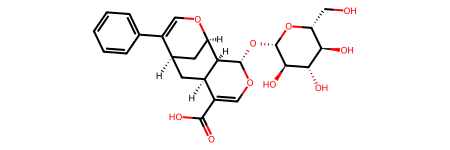

In [421]:
best_modlecule

# Next Step: designing a synthetic pathway. 

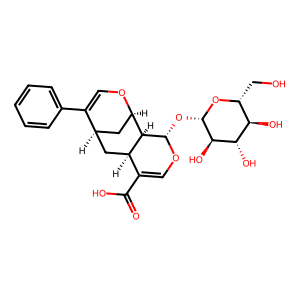

In [425]:
from rdkit import Chem
from rdkit.Chem import Draw
Draw.MolToImage(best_modlecule)

## Understanding the structure of this molecule

Mark the index on the atoms

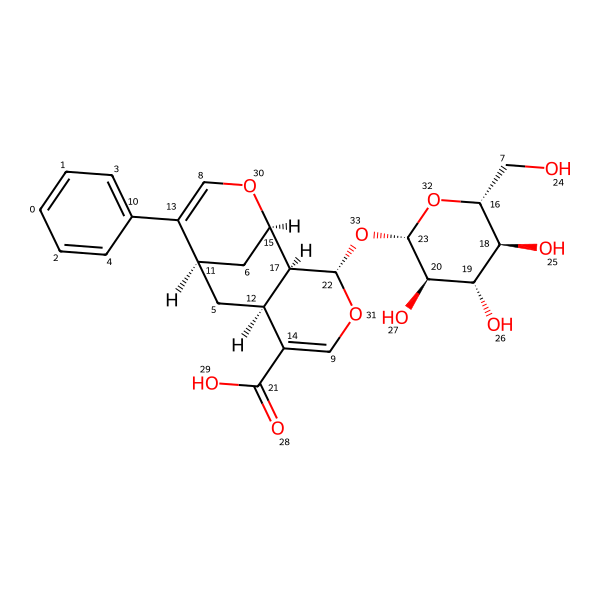

In [472]:
from rdkit import Chem
from rdkit.Chem import Draw

# Provided InChI string for Loniphenyruviridoside A
inchi_str = 'InChI=1S/C24H28O10/c25-8-17-19(26)20(27)21(28)24(33-17)34-23-18-13(15(10-32-23)22(29)30)6-12-7-16(18)31-9-14(12)11-4-2-1-3-5-11/h1-5,9-10,12-13,16-21,23-28H,6-8H2,(H,29,30)/t12-,13-,16-,17-,18+,19-,20+,21-,23+,24+/m1/s1'

# Convert InChI to molecule
molecule = Chem.MolFromInchi(inchi_str)

# Add atom indices to the molecule
for atom in molecule.GetAtoms():
    atom.SetProp('atomNote', str(atom.GetIdx()))

# Draw the molecule with atom indices labeled
molecule_with_indices = Draw.MolToImage(molecule, size=(600, 600), kekulize=True)

# Display the image with atom indices
molecule_with_indices

chiral centers

Chiral Centers: [(11, 'R'), (12, 'S'), (15, 'R'), (16, 'R'), (17, 'S'), (18, 'S'), (19, 'S'), (20, 'R'), (22, 'S'), (23, 'S')]


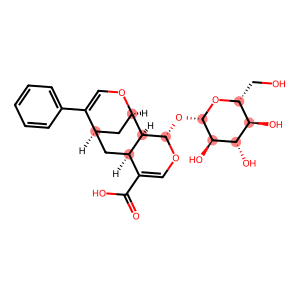

In [486]:
from rdkit.Chem import Draw
chiral_centers = Chem.FindMolChiralCenters(molecule, includeUnassigned=True)
print("Chiral Centers:", chiral_centers)

# Draw the molecule with chiral centers highlighted
Draw.MolToImage(molecule, highlightAtoms=[center[0] for center in chiral_centers])


Glycoside Moiety

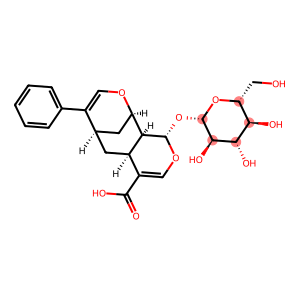

In [484]:
glycoside_atom_indices = [16, 18, 19, 20, 23]
Draw.MolToImage(molecule, highlightAtoms=glycoside_atom_indices)


phenyl group

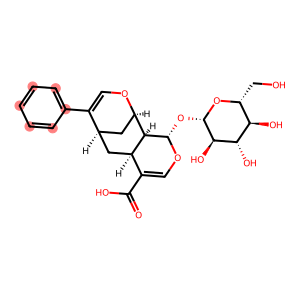

In [481]:
phenyl_atom_indices = [0,1,2,3,4,10]
Draw.MolToImage(molecule, highlightAtoms=phenyl_atom_indices)

Carboxyl Group (O-C-OH)

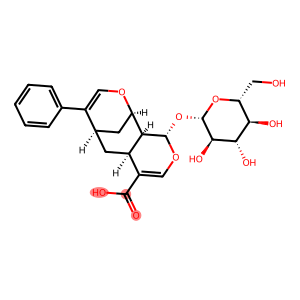

In [483]:
carboxyl_indices = [21,28,29] 
Draw.MolToImage(molecule, highlightAtoms=carboxyl_indices)


the last part -- I don't know what they are called. Not sure how to build this CORE part. It has 3 six-member rings. Two of them has a O. The middle are all C. 

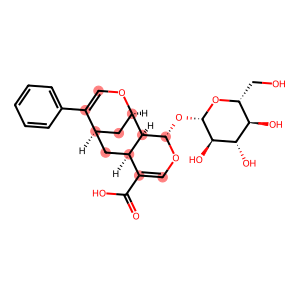

In [490]:
some_indices = [6,5, 8,9,11,12,13,14,15, 17,22] 
Draw.MolToImage(molecule, highlightAtoms=some_indices)

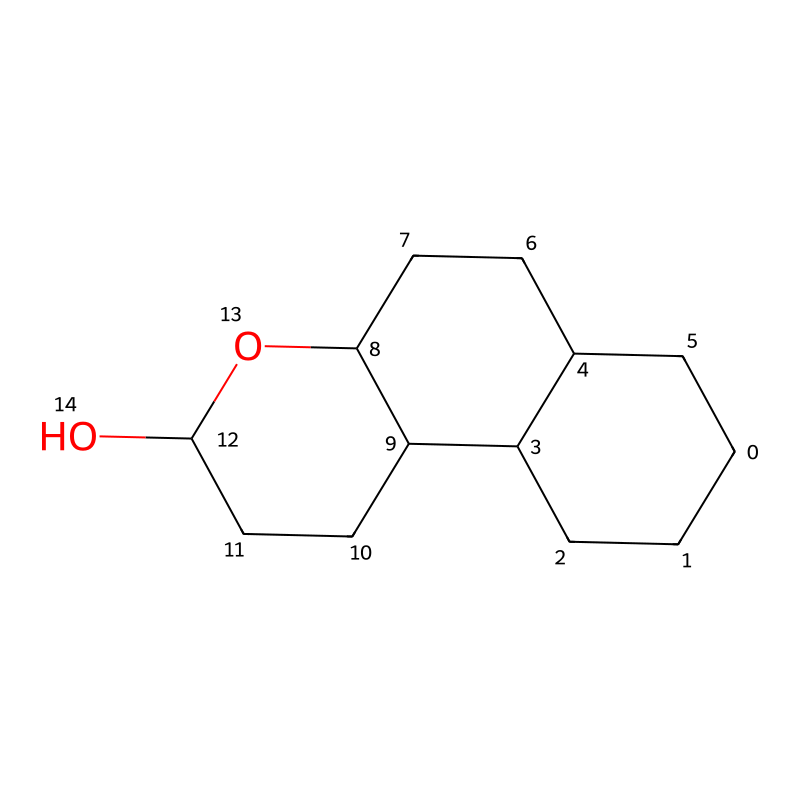

In [492]:
from rdkit import Chem
from rdkit.Chem import Draw

# Example SMILES string for a tricyclic structure (this is just a representative example)
# In a real case, you would use the exact SMILES or InChI string for your specific molecule
smiles_str = 'C1CCC2C(C1)CCC3C2CCC(O3)O'  # Example tricyclic structure with oxygen atoms

# Convert SMILES to molecule
molecule = Chem.MolFromSmiles(smiles_str)

# Add atom indices to the molecule for visualization
for atom in molecule.GetAtoms():
    atom.SetProp('atomNote', str(atom.GetIdx()))

# Draw the molecule with atom indices labeled
Draw.MolToImage(molecule, size=(800, 800))

# Garbage old code bank

In [416]:
dir(best_compound[0][0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_atoms',
 '_bonds',
 '_record',
 '_setup_atoms',
 '_setup_bonds',
 'aids',
 'atom_stereo_count',
 'atoms',
 'bond_stereo_count',
 'bonds',
 'cactvs_fingerprint',
 'canonical_smiles',
 'charge',
 'cid',
 'complexity',
 'conformer_id_3d',
 'conformer_rmsd_3d',
 'coordinate_type',
 'covalent_unit_count',
 'defined_atom_stereo_count',
 'defined_bond_stereo_count',
 'effective_rotor_count_3d',
 'elements',
 'exact_mass',
 'feature_selfoverlap_3d',
 'fingerprint',
 'from_cid',
 'h_bond_acceptor_count',
 'h_bond_donor_count',
 'heavy_atom_count',
 'inchi',
 'inchikey',
 'isomeric_smiles',
 'is

In [104]:
import pubchempy as pcp

# Search for a compound by name
chemical_name = "Apigenin-7-O-alpha-L-rhamnoside" #'aspirin'

compounds = pcp.get_compounds(chemical_name, 'name')

# Print information about the found compounds
for compound in compounds:
    print(f"IUPAC Name: {compound.iupac_name}")
    print(f"Molecular Formula: {compound.molecular_formula}")
    print(f"Molecular Weight: {compound.molecular_weight}")
    print(f"Canonical SMILES: {compound.canonical_smiles}")
    print(f"Isomeric SMILES: {compound.isomeric_smiles}")
    print(f"InChI: {compound.inchi}")
    print(f"InChI Key: {compound.inchikey}")
    print(f"CID: {compound.cid}")
    print("-" * 30)

In [113]:
# Code copied online. Need to figure out how it works

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as np



# Create a DataFrame for features
df = pd.DataFrame(descriptor_list)

# Example labels (binary classification)
labels = [0, 1, 0, 1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model using cross-validation
scores = cross_val_score(model, X_test, y_test, cv=5)
print("Model Accuracy: ", np.mean(scores))


ModuleNotFoundError: No module named 'sklearn'

In [434]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.molSize = 450,450 
# Define the Iridoid core structure using SMILES notation
# This is a simplified representation of the core structure
iridoid_core_smiles = "C1[C@H]2C[C@H](C1)OC2"

# Convert SMILES to molecule
iridoid_core_molecule = Chem.MolFromSmiles(iridoid_core_smiles)

# Draw the molecule
iridoid_core_image = Draw.MolToImage(iridoid_core_molecule)

# Display the image

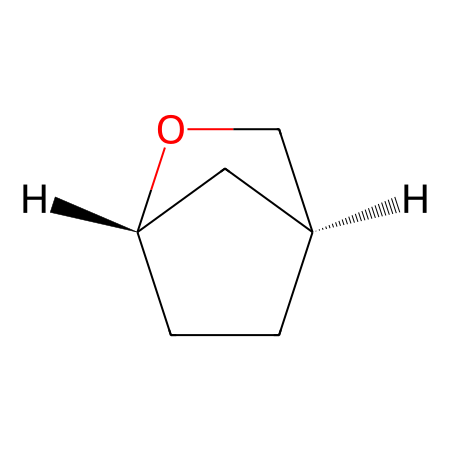

In [436]:
iridoid_core_molecule

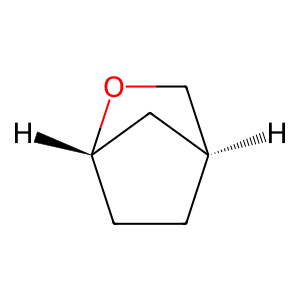

In [437]:
iridoid_core_image

In [438]:
from rdkit import Chem
from rdkit.Chem import Draw

# Define the Iridoid core structure using SMILES notation
iridoid_core_smiles = "C1C[C@H]2C[C@@H](C1)OC2"

# Convert SMILES to molecule
iridoid_core_molecule = Chem.MolFromSmiles(iridoid_core_smiles)

# Draw the molecule
iridoid_core_image = Draw.MolToImage(iridoid_core_molecule)

# Display the image
iridoid_core_image.show()

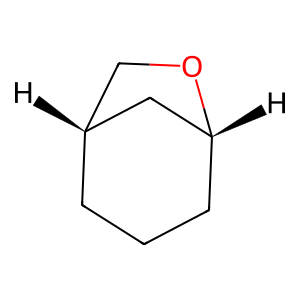

In [439]:
iridoid_core_image

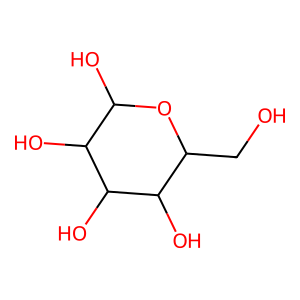

In [441]:
from rdkit import Chem
from rdkit.Chem import Draw

# Define the glucose structure using SMILES notation
glucose_smiles = "C(C1C(C(C(C(O1)O)O)O)O)O"

# Convert SMILES to molecule
glucose_molecule = Chem.MolFromSmiles(glucose_smiles)

# Draw the molecule
glucose_image = Draw.MolToImage(glucose_molecule)

# Display the image
glucose_image

Chiral Centers: [(11, 'R'), (12, 'S'), (15, 'R'), (16, 'R'), (17, 'S'), (18, 'S'), (19, 'S'), (20, 'R'), (22, 'S'), (23, 'S')]


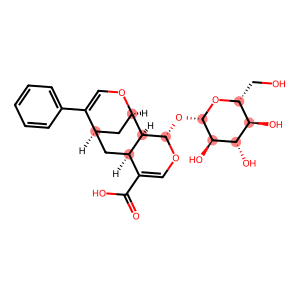

In [442]:
from rdkit import Chem
from rdkit.Chem import Draw

# Provided InChI string
inchi_str = 'InChI=1S/C24H28O10/c25-8-17-19(26)20(27)21(28)24(33-17)34-23-18-13(15(10-32-23)22(29)30)6-12-7-16(18)31-9-14(12)11-4-2-1-3-5-11/h1-5,9-10,12-13,16-21,23-28H,6-8H2,(H,29,30)/t12-,13-,16-,17-,18+,19-,20+,21-,23+,24+/m1/s1'

# Convert InChI to molecule
molecule = Chem.MolFromInchi(inchi_str)

# Get chiral centers
chiral_centers = Chem.FindMolChiralCenters(molecule, includeUnassigned=True)
print("Chiral Centers:", chiral_centers)

# Draw the molecule with chiral centers highlighted
molecule_with_chirality = Draw.MolToImage(molecule, highlightAtoms=[center[0] for center in chiral_centers])

# Display the image
molecule_with_chirality